In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Loading files and setting up variables

In [9]:
folder_path = 'D:/Dropbox/Slice Video Processing/Ricardo - Rotation/2022_03_02/test_bn_videos/suite2p/plane0/'
F = np.load(folder_path + 'F.npy', allow_pickle=True)
Fneu = np.load(folder_path + 'Fneu.npy', allow_pickle=True)
spks = np.load(folder_path + 'spks.npy', allow_pickle=True)
stat = np.load(folder_path + 'stat.npy', allow_pickle=True)
ops =  np.load(folder_path + 'ops.npy', allow_pickle=True)
iscell = np.load(folder_path + 'iscell.npy', allow_pickle=True)

# Exploring data

Most of the info is contained in the ops variable


In [12]:
ops = ops.item()
ops.keys()

dict_keys(['suite2p_version', 'look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'bruker_bidirectional', 'h5py', 'h5py_key', 'nwb_file', 'nwb_driver', 'nwb_series', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp_reg', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'sparse_mode', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'max_overlap', 'high_pass'

In [13]:
stat

array([{'ypix': array([478, 478, 478, 478, 478, 478, 478, 478, 479, 479, 479, 479, 479,
              479, 479, 479, 479, 479, 480, 480, 480, 480, 480, 480, 480, 480,
              480, 480, 480, 480, 481, 481, 481, 481, 481, 481, 481, 481, 481,
              481, 481, 481, 481, 481, 482, 482, 482, 482, 482, 482, 482, 482,
              482, 482, 482, 482, 482, 482, 483, 483, 483, 483, 483, 483, 483,
              483, 483, 483, 483, 483, 483, 483, 483, 483, 484, 484, 484, 484,
              484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 484, 485,
              485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485,
              485, 485, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486,
              486, 486, 486, 486, 486, 487, 487, 487, 487, 487, 487, 487, 487,
              487, 487, 487, 487, 487, 487, 487, 487, 488, 488, 488, 488, 488,
              488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 489, 489,
              489, 489, 489, 489, 489, 489,

25


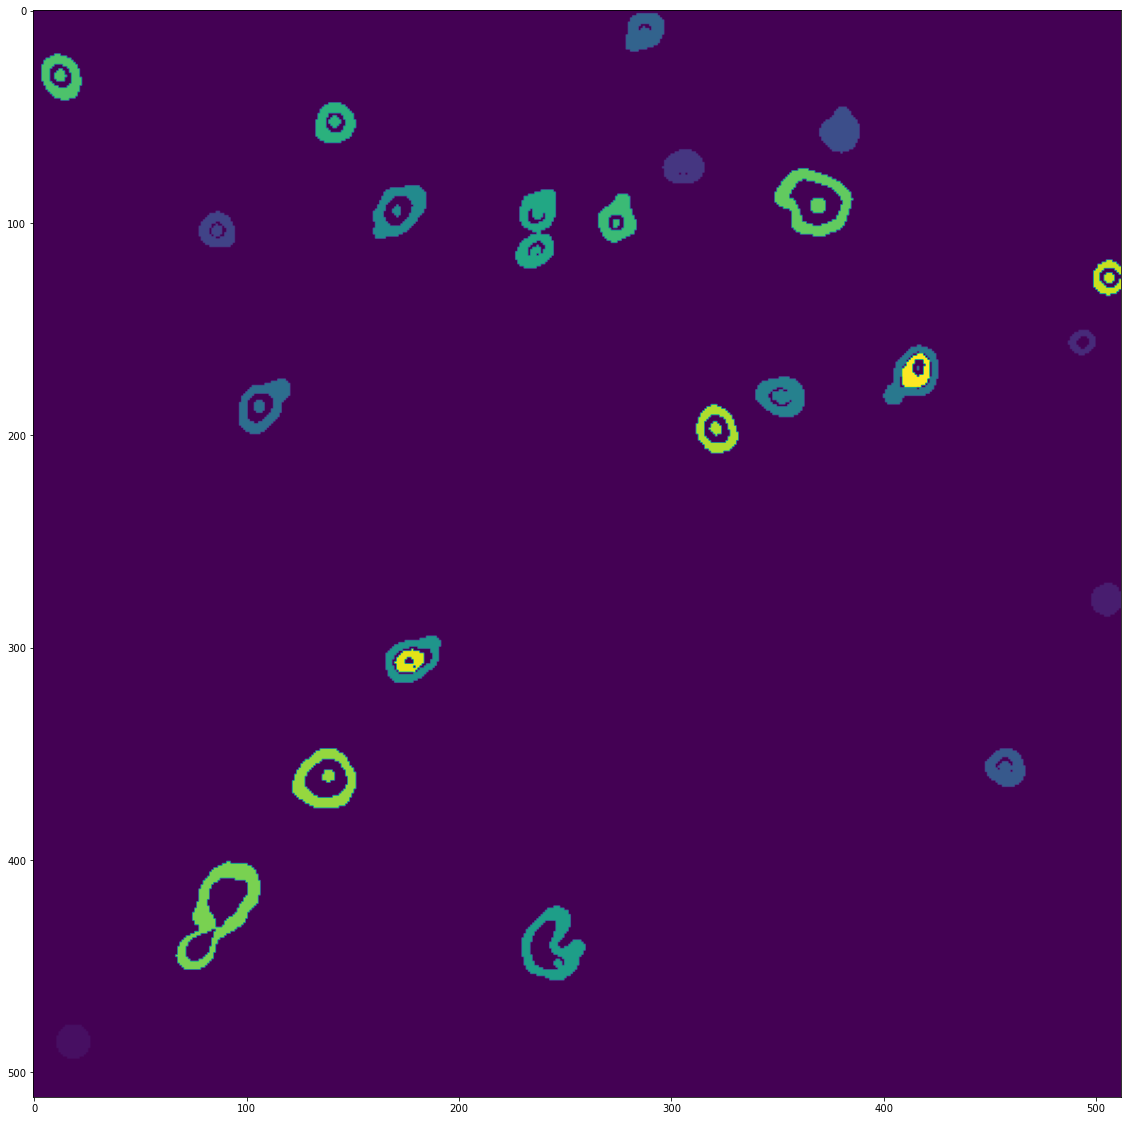

In [14]:
ncells = stat.shape[0] # Total number of cells
print(ncells)
im = np.zeros((ops['Ly'], ops['Lx']))

for n in range(0,ncells):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

plt.figure(figsize=(20,20))
plt.imshow(im)
plt.show()

In [197]:
# load traces
data = np.loadtxt("test_traces.csv", delimiter=",", dtype=float)

In [198]:
# Parameters
frames_per_second = 25
num_cells = data.shape[0]
samples = data.shape[1]
duration = samples / frames_per_second
time = np.arange(start = 0, stop=int(duration), step=1/frames_per_second)

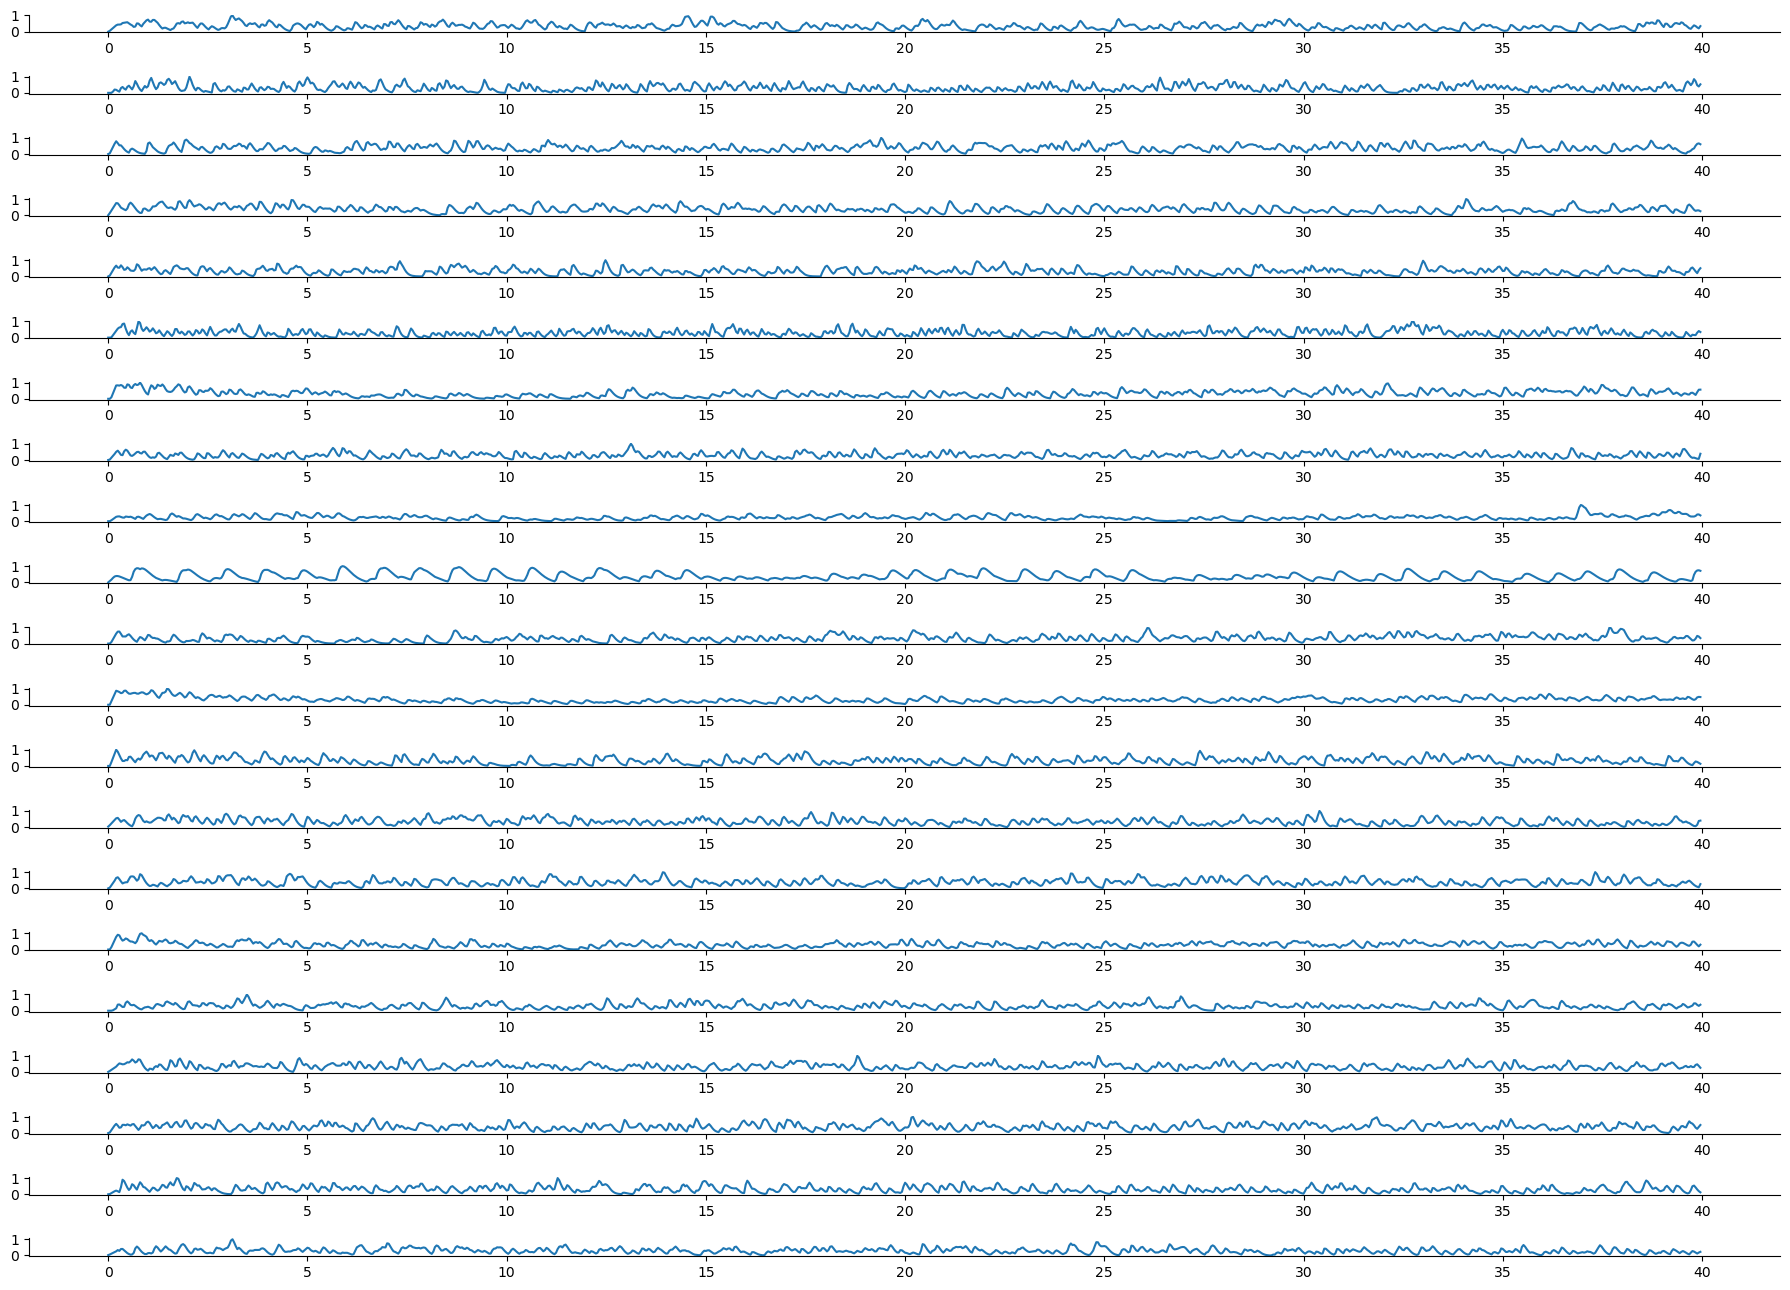

In [199]:
# Plot the traces
fig, axs = plt.subplots(num_cells)
for cell_num in range(num_cells):
    axs[cell_num].plot(time,data[cell_num, 0:len(time)])

In [200]:
# Correlation coefficients
corrs, pvals = stats.spearmanr(np.transpose(data))

Text(0, 0.5, 'Neuron #')

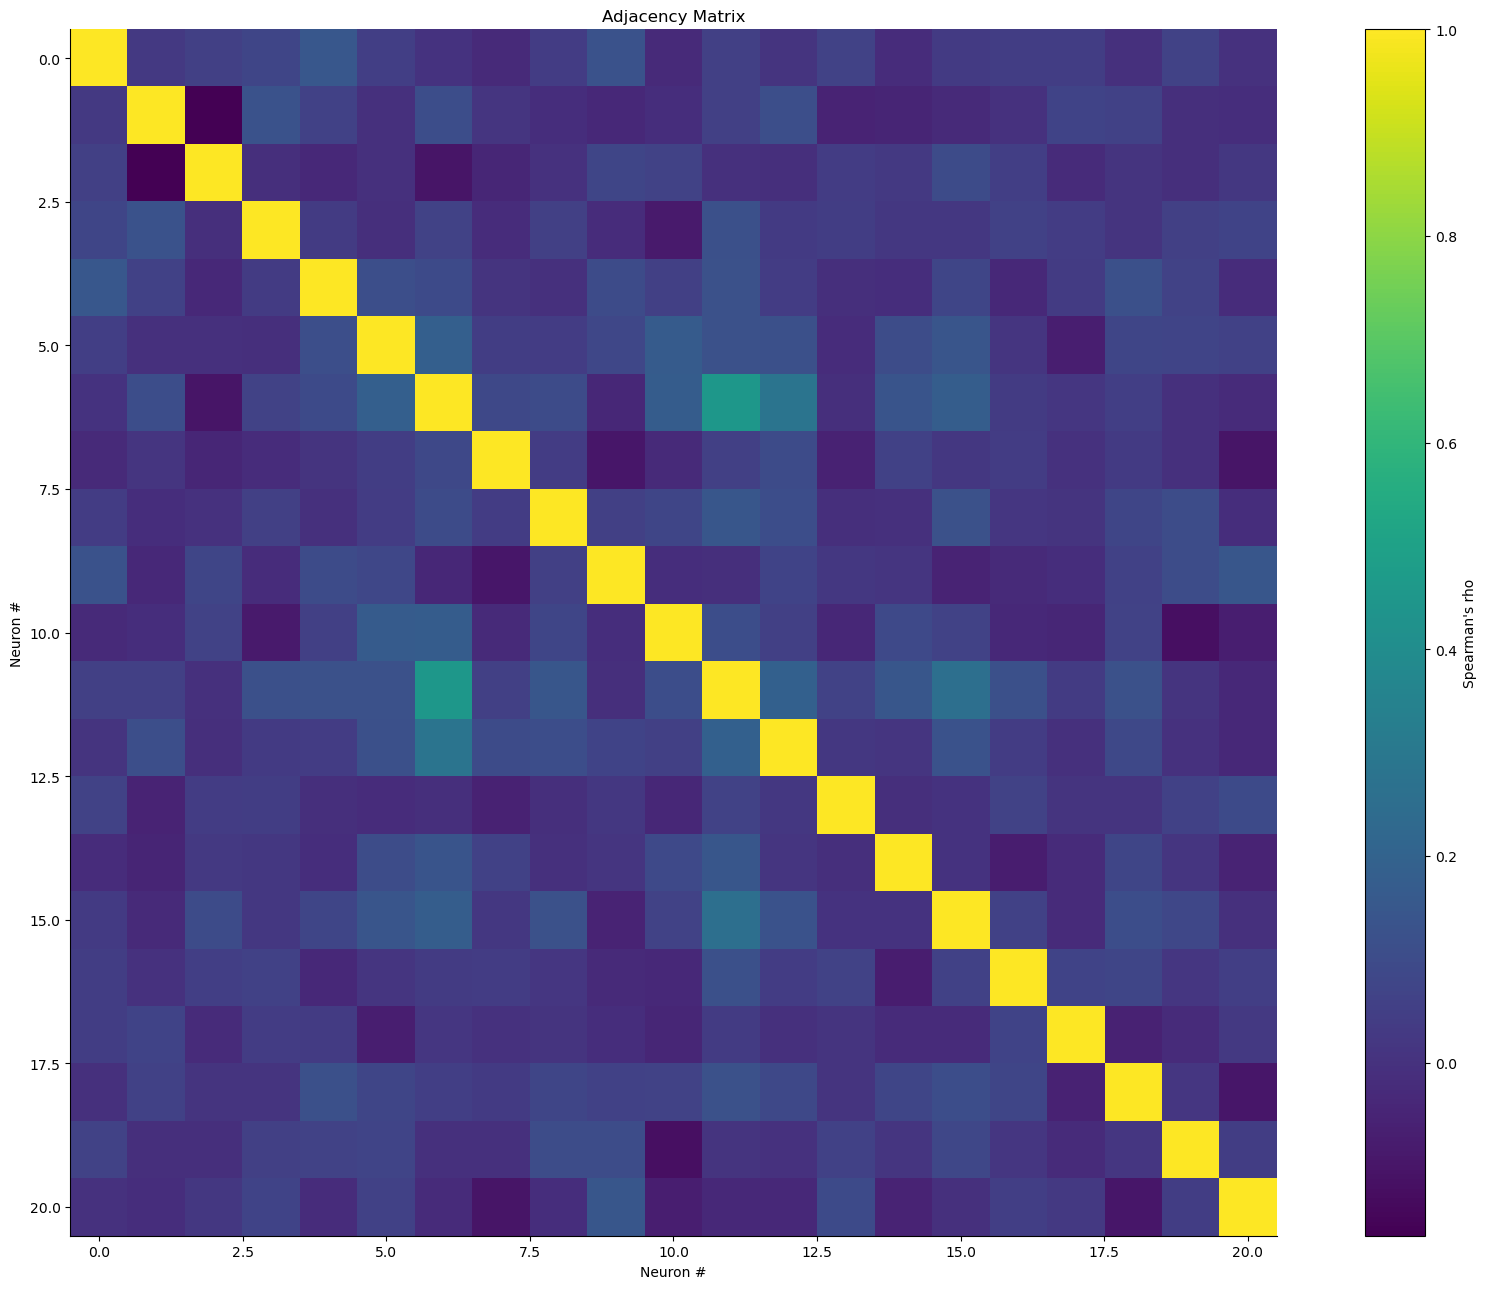

In [201]:
# Display the correlations
# Each square represents a "cell pair"
fig2 = plt.figure()
plt.imshow(corrs)
plt.colorbar(label="Spearman's rho")
plt.title("Adjacency Matrix")
# Fix axis so that they don't show floats and start at 1 rather than 0
plt.xlabel('Neuron #')
plt.ylabel('Neuron #')

In [ ]:
# Extrace mean values
lower_triangle = np.tril(corrs)
mean_corr = np.mean(lower_triangle) 